In [1]:
# Web Scrapping on WORLD HAPPINESS REPORT-2020
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
urlpage = 'file:///C:/Users/jayakrishnan/Desktop/WHR.html'

In [3]:
page = urllib.request.urlopen(urlpage)
contents = BeautifulSoup(page,'lxml')

In [4]:
Table = contents.find('table',{'class':'wikitable sortable'})
print(type(Table))

<class 'bs4.element.Tag'>


In [5]:
Table1 = Table.select('tr')
Table1

[<tr valign="top">
 <th style="width: 10px;">Overall rank
 </th>
 <th style="width: 250px;">Country or region
 </th>
 <th><abbr title="Happiness score">Score</abbr>
 </th>
 <th style="width: 10px;"><abbr title="Explained by: GDP">GDP per capita</abbr>
 </th>
 <th style="width: 10px;"><abbr title="Explained by: Social support">Social support</abbr>
 </th>
 <th style="width: 10px;"><abbr title="Explained by: Healthy life expectancy">Healthy life expectancy</abbr>
 </th>
 <th style="width: 10px;"><abbr title="Explained by: Freedom to make life choices">Freedom to make life choices</abbr>
 </th>
 <th style="width: 10px;"><abbr title="Explained by: Generosity">Generosity</abbr>
 </th>
 <th style="width: 10px;"><abbr title="Explained by: Perceptions of corruption">Perceptions of corruption</abbr>
 </th></tr>,
 <tr>
 <td>1</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="1100" data-file-width="1800" decoding="async" height="14" src="https://upload.wikimedia.o

In [6]:
col_names=[]
for i in Table1[0].select('th'):
    col_names.append(i.text.replace('\n',''))
col_names

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [7]:
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []
col8 = []
col9 = []
for j in Table1:
    dat = j.select('td')
    if len(dat)==9:
        col1.append(dat[0].text.replace('\n',''))
        col2.append(dat[1].text.replace('\n',''))
        col3.append(dat[2].text.replace('\n',''))
        col4.append(dat[3].text.replace('\n',''))
        col5.append(dat[4].text.replace('\n',''))
        col6.append(dat[5].text.replace('\n',''))
        col7.append(dat[6].text.replace('\n',''))
        col8.append(dat[7].text.replace('\n',''))
        col9.append(dat[8].text.replace('\n',''))

In [8]:
df = pd.DataFrame(columns=col_names)
df[col_names[0]] = col1
df[col_names[1]] = col2
df[col_names[2]] = col3
df[col_names[3]] = col4
df[col_names[4]] = col5
df[col_names[5]] = col6
df[col_names[6]] = col7
df[col_names[7]] = col8
df[col_names[8]] = col9
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434
...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,3.476,0.041,0.000,0.000,0.293,0.254,0.028
149,150,Rwanda,3.312,0.343,0.523,0.572,0.604,0.236,0.486
150,151,Zimbabwe,3.299,0.426,1.048,0.375,0.377,0.151,0.081
151,152,South Sudan,2.817,0.289,0.553,0.209,0.066,0.210,0.111


In [9]:
df[col_names[2:]] = df[col_names[2:]].astype('float')
df.dtypes

Overall rank                     object
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

<BarContainer object of 5 artists>

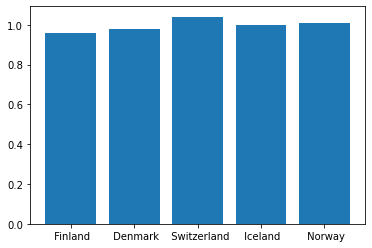

In [10]:
plt.bar(df['Country or region'].head(),df['Healthy life expectancy'].head())

In [11]:
df.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.473255,0.868778,1.155562,0.692882,0.463542,0.189366,0.130719
std,1.112288,0.372418,0.286862,0.254111,0.141139,0.100433,0.113087
min,2.567000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.724000,0.576000,0.987000,0.495000,0.381000,0.115000,0.056000
50%,5.515000,0.919000,1.204000,0.760000,0.483000,0.177000,0.098000
75%,6.228000,1.169000,1.387000,0.867000,0.577000,0.256000,0.163000
max,7.809000,1.537000,1.548000,1.138000,0.693000,0.570000,0.533000


In [12]:
#KMeans clustering technique
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df[['Score','Healthy life expectancy']])
cc = kmeans.cluster_centers_
print('Cluster centers are:\n')
cc

Cluster centers are:



array([[3.84832143, 0.3905    ],
       [6.55606452, 0.88795161],
       [5.1298254 , 0.63530159]])

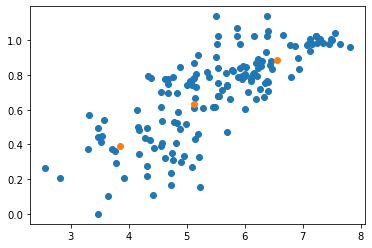

In [13]:
plt.scatter(df['Score'],df['Healthy life expectancy'])
plt.scatter(cc[:,0],cc[:,1])

In [14]:
len(df[df['Score']>7.0])

17

In [45]:
import numpy as np
rnk = pd.DataFrame(columns=['Score','Count'])
rnk = rnk.set_index('Score')
rnk.loc['above 7'] = len(df[df['Score']>=7.0])
rnk.loc['[6 , 7)'] = len(df[df['Score'].between(6,7,inclusive=False)])
rnk.loc['[5 , 6)'] = len(df[df['Score'].between(5,6,inclusive=False)])
rnk.loc['[4 , 5)'] = len(df[df['Score'].between(4,5,inclusive=False)])
rnk.loc['[3 , 4)'] = len(df[df['Score'].between(3,4,inclusive=False)])
rnk.loc['[2 , 3)'] = len(df[df['Score'].between(2,3,inclusive=False)])
rnk.loc['[1 , 2)'] = len(df[df['Score'].between(1,2,inclusive=False)])
rnk

,Count
Score,
above 7,17
"[6 , 7)",35
"[5 , 6)",47
"[4 , 5)",38
"[3 , 4)",13
"[2 , 3)",2
"[1 , 2)",0


In [46]:
rnk['Count'] = rnk['Count'].astype('str') + ' Countries' 

In [47]:
rnk

,Count
Score,
above 7,17 Countries
"[6 , 7)",35 Countries
"[5 , 6)",47 Countries
"[4 , 5)",38 Countries
"[3 , 4)",13 Countries
"[2 , 3)",2 Countries
"[1 , 2)",0 Countries
